## Исследование данных о российском кинопрокате




В нашем распоряжении данные, опубликованные на портале данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.
 
Необходимо изучить рынок российского кинопроката и выявить текущие тренды. 


### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

У нас имеется два листа с данными: данные о прокатных удостоверениях `mkrf_movies`, данные о прокате в российских кинотеатрах `mkrf_shows`.

Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.

Столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.
- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.


In [377]:
import pandas as pd
import matplotlib.pyplot as plt
#импорт библиотек

Посмотрим информацию о данных в первом дата-сете. Выведем несколько первых строк дата-сета а также несколько рандомных строк из всей выборки.


In [378]:
data_1 = pd.read_csv('/datasets/mkrf_movies.csv')
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [379]:
data_1.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [380]:
random_state_number = 10
sample_size_number = 3
data_1.sample(n=sample_size_number, random_state=random_state_number)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
3232,Не стучи дважды,121035116,2016-12-30T12:00:00.000Z,Художественный,"Рэд энд Блэк Филмз, Сэймур Филмз",Великобритания,Карадог В. Джеймс,"Джон Джива-Аму, Клэйр Морсом",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,4.8,"ужасы,фэнтези,триллер"
5901,От семьи не убежишь,121011118,2018-05-31T12:00:00.000Z,Художественный,"Ле Продюксьон дю Шими, Патэ",Франция,Дэни Бун,"Дэни Бун, Эрик Юбер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,комедия
2506,Акт убийства,126001515,2015-05-25T12:00:00.000Z,Прочие,"Финал Кат Фор Риал, Пирайа Фильм, Новая Земля,...",Дания - Норвегия - Великобритания,"Джошуа Оппенхаймер, Кристина Синн","Анне Кёнке, Синье Бридж Серенсен, Кристина Син...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"документальный,криминал,военный"


 В первом дата-сете видим 15 столбцов. Три из которых относятся к типу `float64` остальные к типу `object`. Имеются пропущенные значения.

Посмотрим информацию о данных во втором дата-сете. Выведем первые пять строк дата-сета.

In [381]:
data_2 = pd.read_csv('/datasets/mkrf_shows.csv')
data_2.head(5)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


Объединим данные по столбцу 'puNumber'. Поменяем тип данных на строки.

In [382]:
data_2['puNumber'] = data_2['puNumber'].astype('str') 
data = data_1.merge(data_2, on='puNumber', how='left')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), object(12)
memory usage: 994.2+ KB


Проверим по нескольким номерам прокатного удостоверения, что данные о сборах подтянулись корректно.

In [383]:
data[(data['puNumber'] == '111000113') | (data['puNumber'] == '111000115')]


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1128,Тайна перевала Дятлова,111000113,2013-01-17T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.1,"ужасы,фантастика",2450.0
2397,Небесный верблюд,111000115,2015-01-14T12:00:00.000Z,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,0.0,34000000.0,49280496.0,Министерство культуры,6.7,"детский,семейный",61040.0


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

После объединения данных в итоговой таблице с данными 16 столбцов. Мы наблюдаем 2 вида данных - `float64` и `object`.

In [384]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), object(12)
memory usage: 994.2+ KB


1. Заменим данные в столбцах на float32.

In [385]:
data = data.astype({'refundable_support': 'float32',
                    'nonrefundable_support': 'float32',
                    'budget': 'float32',
                    'box_office': 'float32'
                   })

2. Заменим тип данных в столбце с датой 'show_start_date'.

In [386]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y-%m-%dT%H:%M:%S')


In [387]:
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


3. В столбце с рейтингом видим, что имеются пропущенные значения, а также рейтинг, указанный в %.

In [388]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Заменим в данных, которые указаны проценты знак процента, далее заполним пропуски на нулевые значения и напишем фунцкцию, которая возвращает рейтинг в корректной шкале.

In [389]:
data['ratings'] = data['ratings'].str.replace('%','').fillna(0).astype('float64')

def correct_rating(row):
    rating = row['ratings']
    if rating > 10:
        rating = rating/10
    return rating

data['ratings'] = data.apply(correct_rating, axis=1)


In [390]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null datetime64[ns, UTC]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float32
nonrefundable_support    332 non-null float32
budget                   332 non-null float32
financing_source         332 non-null object
ratings                  7486 non-null float64
genres                   6510 non-null object
box_office               3158 non-null float32
dtypes: datetime64[ns, UTC](1), float32(4), float64(1), object(10)
memory usage: 877.3+ KB


In [391]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 0. , 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Рассмотрим пропуски в финальном дата-фрейме.

In [392]:
print(data.isna().sum().sort_values()/len(data)*100)

title                     0.000000
puNumber                  0.000000
show_start_date           0.000000
type                      0.000000
age_restriction           0.000000
ratings                   0.000000
production_country        0.026717
director                  0.120224
film_studio               0.240449
producer                  7.587497
genres                   13.037670
box_office               57.814587
refundable_support       95.565055
nonrefundable_support    95.565055
budget                   95.565055
financing_source         95.565055
dtype: float64


Видим, что количество пропусков достаточно большое. Пропуски в формате `NaN`. Заменим пропуски в столбцах: `production_country`, `director`,`film_studio`, `producer`, `genres` на значения `unknown`.

In [393]:
columns_to_replace = ['production_country', 'director', 'film_studio', 'producer', 'genres']

for item in columns_to_replace:
      data[item] = data[item].fillna('unknown')

Проверим количество пропущенных значений в дата-фрейме после замены пропусков/

In [394]:
print(data.isna().sum().sort_values()/len(data)*100)

title                     0.000000
puNumber                  0.000000
show_start_date           0.000000
type                      0.000000
film_studio               0.000000
production_country        0.000000
director                  0.000000
producer                  0.000000
age_restriction           0.000000
ratings                   0.000000
genres                    0.000000
box_office               57.814587
refundable_support       95.565055
nonrefundable_support    95.565055
budget                   95.565055
financing_source         95.565055
dtype: float64


По количественным значениям пропуски заполнять не будем. Так как каждое значение отвечает индивидуально рассмотренному фильму.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Рассмотрим дубликаты в двух первых столбцах:

- title — название фильма;
- puNumber — номер прокатного удостоверения.

В остальных столбцах дубликаты допустимы.


In [395]:
print(data['title'].value_counts())

День святого Валентина_                 5
Безумцы                                 4
Начало_                                 4
Белоснежка и охотник                    4
Код доступа "Кейптаун"                  4
                                       ..
Болевой порог                           1
Ловец снов /По роману Стивена Кинга/    1
Импрессионисты                          1
Кольца мира. Часть первая               1
12 месяцев                              1
Name: title, Length: 6772, dtype: int64


Из данных выше видим, что наименования фильмов повторяются. Но вероятно, что фильмы просто являются ремейками или другими частями, тк по остальным столбцам возможно данные отличаются. Проверим данную гипотизу.

In [396]:
data[data.duplicated('title')]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный",7.595260e+05
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"фэнтези,приключения,семейный",1.125302e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",1.750035e+05
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


Видим, что точно имеется дубликат по фильму "Особо опасен". Удалим его.

In [397]:
data[data['title'] == 'Особо опасен']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [398]:
data.drop([3, 4], inplace=True)

In [399]:
data[data['title'] == 'Особо опасен']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [400]:
print(data['puNumber'].value_counts())

221054410    2
221154310    2
121033816    1
121005617    1
111003515    1
            ..
121024511    1
111026518    1
111011515    1
221148210    1
121033119    1
Name: puNumber, Length: 7482, dtype: int64


In [401]:
data[(data['puNumber'] == '221154310') | (data['puNumber'] == '221054410')]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [402]:
data.drop([4638, 5067], inplace=True)

In [403]:
data[(data['puNumber'] == '221154310') | (data['puNumber'] == '221054410')]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Рассмотрим столбец `type`. Видим, что в части значений имеются пробелы вначале строк. Удалим пробелы.

In [404]:
data['type'].value_counts()

Художественный                4516
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

In [405]:
data['type'] = data['type'].str.strip()

In [406]:
data['type'].value_counts()

Художественный                5905
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

Для более удобного анализа оставим в столбце с возрастной категорией только возраст.

In [407]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [408]:
def age_group(age):
    if '«18+»' in age:
        return 'запрещено для детей'
    elif '«6+»' in age:
        return 'для детей старше 6 лет'
    elif '«12+»' in age:
        return 'для детей старше 12 лет' 
    elif '«16+»' in age:
        return 'для детей старше 16 лет'  
    return 'для любой зрительской аудитории'

data['age_restriction'] = data['age_restriction'].apply(age_group)

Для целей дальнейшего анализа распределим фильмы по категориям в зависимости от рейтинга.

In [409]:

def rating_groups(rating):
    if 0 <= rating <= 5:
        return 'низкий рейтинг'
    elif 5 < rating <= 7:
        return 'средний рейтинг' 
    return 'высокий рейтинг'

data['rating_group'] = data['ratings'].apply(rating_groups)



#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

 Cтолбец `budget` уже включает в себя полный объём государственной поддержки. Проверим, есть ли элементы выборки, в которых сумма `refundable_support` и `nonrefundable_support` больше значений в столбце `budget`.

Добавим столбец с суммарным значением поддержки.

In [410]:
data['total_support'] = data['refundable_support'] + data['nonrefundable_support']

In [411]:
data.query('total_support >= budget').head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,rating_group,total_support
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016.0,средний рейтинг,23000000.0
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,446163520.0,средний рейтинг,75000000.0
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",196572432.0,высокий рейтинг,80000000.0
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",67418976.0,средний рейтинг,20000000.0
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184487552.0,низкий рейтинг,160000000.0


In [412]:
data.query('total_support >= budget')['budget'].count()

17

In [413]:
data.query('total_support >= budget')['budget'].unique()

array([0.])

Видим, что такие элементы имеются. При имеющихся значениях в столбцах `refundable_support` и `nonrefundable_support`, значения в столбце `budget` - нулевое. Возможно произошла техническая ошибка. Всего таких значений 17. Удалим их из нашего дата-сета.

In [414]:
null_budget = data[data['total_support'] >= data['budget']]
data = data.drop(null_budget.index, axis = 0)

In [415]:
data.query('total_support >= budget')['budget'].count()

0

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [416]:
data['show_start_year'] = data['show_start_date'].dt.year


In [417]:
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,rating_group,total_support,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,высокий рейтинг,NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,средний рейтинг,NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,средний рейтинг,NaN,2016


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [418]:
def split_row (row):
    delimiter = ','
    split_row = row.split(delimiter)   
    return split_row[0]

data['general_genre'] = data['genres'].apply(split_row) 
data['general_director'] = data['director'].apply(split_row)

In [419]:
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,rating_group,total_support,show_start_year,general_genre,general_director
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",запрещено для детей,NaN,...,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,высокий рейтинг,NaN,2015,боевик,Кевин Костнер
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,для детей старше 6 лет,NaN,...,NaN,NaN,6.6,"драма,военный",NaN,средний рейтинг,NaN,2016,драма,Е.Матвеев
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",запрещено для детей,NaN,...,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,средний рейтинг,NaN,2016,фантастика,Тимур Бекмамбетов


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [420]:
data['goverment_part_of_budjet'] = data['total_support'] / data['budget']

In [421]:
data[data['goverment_part_of_budjet'] > 0].head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,rating_group,total_support,show_start_year,general_genre,general_director,goverment_part_of_budjet
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",для детей старше 16 лет,0.0,...,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,высокий рейтинг,26500000.0,2013,драма,А.Атанесян,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,для детей старше 12 лет,0.0,...,Министерство культуры,0.0,unknown,2.814000e+04,низкий рейтинг,26000000.0,2014,unknown,А.Якимчук,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",для детей старше 12 лет,0.0,...,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,средний рейтинг,107847944.0,2013,комедия,Р.Давлетьяров,0.612691
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,для детей старше 16 лет,0.0,...,Министерство культуры,4.2,драма,5.591750e+04,низкий рейтинг,28000000.0,2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),0.690095
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",для детей старше 16 лет,0.0,...,Министерство культуры,6.4,драма,2.321000e+05,средний рейтинг,25000000.0,2014,драма,М.Угаров,0.624764


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [422]:
number_of_films_per_year_box_office = data.groupby('show_start_year')['box_office'].count()
total_number_of_films_per_year = data.groupby('show_start_year')['title'].count()
#display(number_of_films_per_year_pu)
#display(total_number_of_films_per_year)

share_box_office_films = number_of_films_per_year_box_office / total_number_of_films_per_year
print(share_box_office_films)

show_start_year
2010    0.106816
2011    0.175241
2012    0.215852
2013    0.292063
2014    0.344913
2015    0.657593
2016    0.642506
2017    0.705765
2018    0.531003
2019    0.569429
dtype: float64


- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

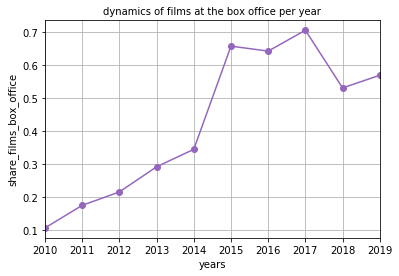

In [423]:
share_box_office_films.plot(grid=True, linestyle='-', marker='o', color='C4')
plt.xlabel('years')
plt.ylabel('share_films_box_office')
plt.title("dynamics of films at the box office per year", fontsize=10);

Из графика видим, что маскимальное количество фильмов, вышедших в прокат наблюдается в 2015 и 2017 годах. Минимум приходится на 2010 год.

In [424]:
budget_box_office_films = data.pivot_table(index='show_start_year', values='box_office', aggfunc='sum')
budget_box_office_films.columns = ['budget_box_office_films']
display(budget_box_office_films)

,budget_box_office_films
show_start_year,
2010,2.428654e+06
2011,1.410276e+07
2012,6.955423e+06
2013,2.979971e+07
2014,7.434718e+09
2015,3.852783e+10
2016,4.674232e+10
2017,4.845815e+10
2018,4.925199e+10


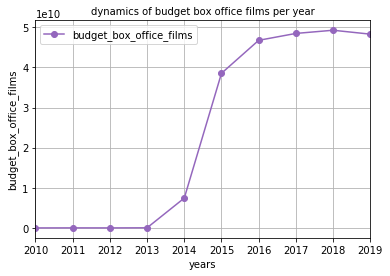

In [425]:
budget_box_office_films.plot(grid=True, linestyle='-', marker='o', color='C4', )
plt.xlabel('years')
plt.ylabel('budget_box_office_films')
plt.title("dynamics of budget box office films per year", fontsize=10);

Видим, что сумма сборов до 2013 года была минимальной. В 2015 году наблюдается резкий рост. Максимум приходится на 2018 год

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [426]:
mean_median_budget_box_office_films = data.pivot_table(index='show_start_year',
                                                       values='box_office',
                                                       aggfunc=['mean','median'])

mean_median_budget_box_office_films.columns = ['mean_budget_box_office_films', 'median_budget_box_office_films']
display(mean_median_budget_box_office_films)

,mean_budget_box_office_films,median_budget_box_office_films
show_start_year,,
2010,2.313004e+04,1700.0
2011,1.293832e+05,3000.0
2012,5.433924e+04,5660.0
2013,1.619549e+05,3522.5
2014,2.674359e+07,18137.5
2015,8.393862e+07,4784781.5
2016,8.937346e+07,3776087.5
2017,1.365018e+08,9919415.0
2018,1.045690e+08,8751896.0


Из таблицы также видим, что что сумма сборов до 2013 года была меньше всего. В 2015 году наблюдается резкий рост. Максимум приходится на 2018 год

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [427]:
budget_box_office_films_age = data.pivot_table(index='show_start_year', columns='age_restriction', values='box_office', aggfunc='median')
display(budget_box_office_films_age)

age_restriction,для детей старше 12 лет,для детей старше 16 лет,для детей старше 6 лет,для любой зрительской аудитории,запрещено для детей
show_start_year,,,,,
2010,2650.00,1000.00,NaN,6052.50,915.0
2011,3741.50,2835.00,450.0,7010.00,520.0
2012,3685.00,1600.00,6475.0,18067.50,1385.0
2013,2250.00,3300.00,3457.5,13225.00,1775.0
2014,6037.50,13420.00,125810.0,190855.00,180108.0
2015,15144119.00,4321194.50,19513254.0,2943318.75,4654761.5
2016,4225478.00,5085193.00,3026256.0,2571294.00,6107001.5
2017,9010548.00,9641408.00,50274984.0,22178956.00,8212677.0
2018,8931966.00,8751896.00,14458669.0,3616937.25,7179466.0


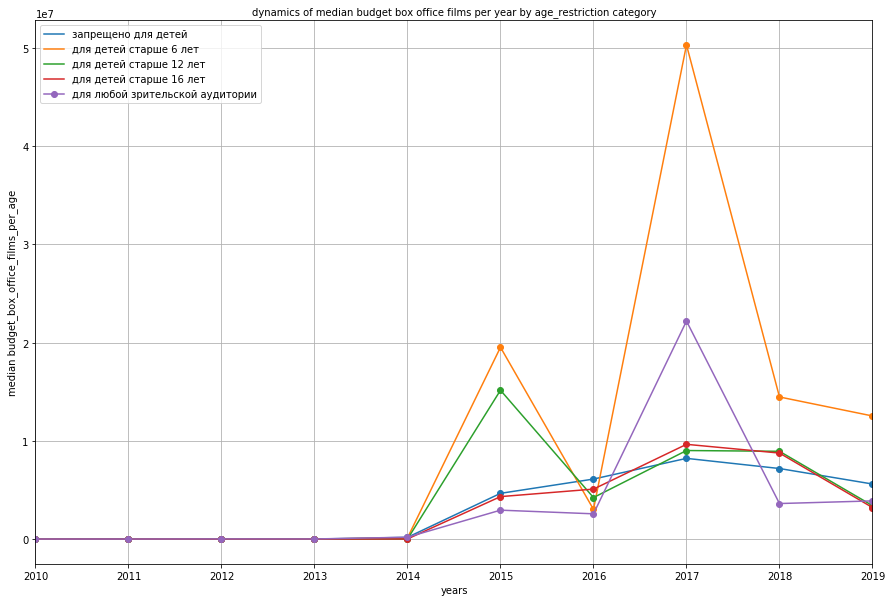

In [428]:
age_category = data['age_restriction'].unique()

for age in age_category:
    budget_box_office_films_age[age].plot(grid=True, linestyle='-', marker='o', figsize=(15,10), legend=True)
    
plt.xlabel('years')
plt.ylabel('median budget_box_office_films_per_age')
plt.title("dynamics of median budget box office films per year by age_restriction category", fontsize=10);   

Исходя из графика видим, что возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) влияет на сборы фильма в прокате в период с 2015 по 2019 год.  Фильмы с возрастным ограничением «6+» собрали больше всего денег. В 2015 году наиболее популярными были фильмы «6+» и «12+». 2017 год демонстрирует максимальный рост по сборам. Наиболее популярными в этом году стали фильмы «6+» и «0+».
Возрастные ограничения, возможно, увеличивают стоимость билета.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [429]:
goverment_help_films = data[(data['refundable_support'] > 0) | (data['nonrefundable_support'] > 0)]
display(goverment_help_films.head(3))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,rating_group,total_support,show_start_year,general_genre,general_director,goverment_part_of_budjet
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",для детей старше 16 лет,0.0,...,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,высокий рейтинг,26500000.0,2013,драма,А.Атанесян,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,для детей старше 12 лет,0.0,...,Министерство культуры,0.0,unknown,2.814000e+04,низкий рейтинг,26000000.0,2014,unknown,А.Якимчук,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",для детей старше 12 лет,0.0,...,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,средний рейтинг,107847944.0,2013,комедия,Р.Давлетьяров,0.612691


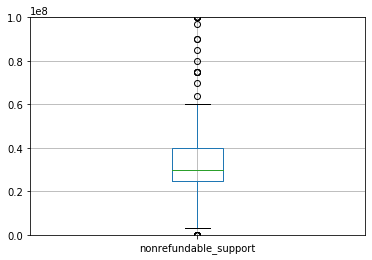

In [430]:
plt.ylim(0,100000000)
goverment_help_films.boxplot(column='nonrefundable_support') 
plt.show()

In [431]:
goverment_help_films_mean_support = goverment_help_films.pivot_table(index='show_start_year',
                                                                  values=['refundable_support', 'nonrefundable_support', 'total_support'],
                                                                  aggfunc='mean')
goverment_help_films_mean_support.columns=['refundable_support_mean','nonrefundable_support_mean', 'total_support_mean']

display(goverment_help_films_mean_support)

,refundable_support_mean,nonrefundable_support_mean,total_support_mean
show_start_year,,,
2013,67173968.0,0.0,67173968.0
2014,31866820.0,4733333.5,36600152.0
2015,33501104.0,6839414.0,40340520.0
2016,53011300.0,15560345.0,68571648.0
2017,62169868.0,17290946.0,79460808.0
2018,48192308.0,11384615.0,59576924.0
2019,55884056.0,12579710.0,68463768.0


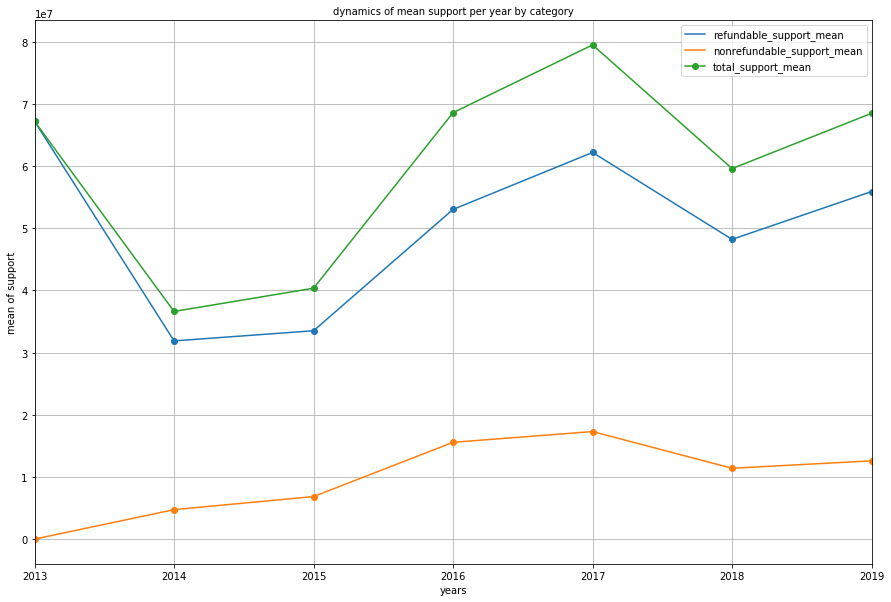

In [432]:
support_category = ['refundable_support_mean','nonrefundable_support_mean', 'total_support_mean']

for support in support_category:
    goverment_help_films_mean_support[support].plot(grid=True, linestyle='-', marker='o', figsize=(15,10), legend=True)
    
    
plt.xlabel('years')
plt.ylabel('mean of support')
plt.title("dynamics of mean support per year by category", fontsize=10); 

Из графика видим, что в целом динамика объёма возвратных средств государственной поддержки и объёма невозвратных средств государственной поддержки совпадает. Максимум приходится на 2017 год.

Проверим окупаются ли фильмы.

In [433]:
sum_of_total_support = goverment_help_films['total_support'].sum()
sum_of_box_office = goverment_help_films['box_office'].sum()
print('Общая сумма государственной поддержки:', sum_of_total_support)
print('Общая сумма сборов для фильмов с государственной поддержкой:', sum_of_box_office)
print('Окупаемость фильмов с государственной поддержкой :', sum_of_box_office - sum_of_total_support)

Общая сумма государственной поддержки: 18808720000.0
Общая сумма сборов для фильмов с государственной поддержкой: 39340175000.0
Окупаемость фильмов с государственной поддержкой : 20531456000.0


Как видим, фильмы окупаются. Проверим, зависит ли окупаемость фильма от его рейтинга.

In [434]:
goverment_help_films['payback'] = goverment_help_films['box_office'] - goverment_help_films['total_support']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [435]:
goverment_help_films['payback'].corr(goverment_help_films['ratings'])

0.08560346513485015

Коэффициент Пирсона говорит скорее о слабой зависимости. Окупаемость фильма не зависит от рейтинга.

In [436]:
goverment_help_films['total_support'].corr(goverment_help_films['ratings'])

0.12420553031061482

Зато сумма предоставленных государственных средств, зависит от рейтинга фильма.

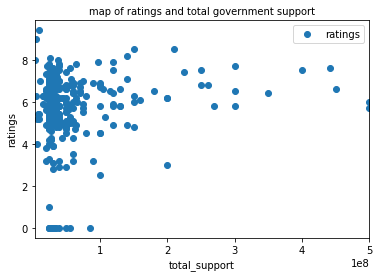

In [437]:
goverment_help_films.plot(x='total_support', y='ratings', style='o')
    
plt.xlabel('total_support')
plt.ylabel('ratings')
plt.title("map of ratings and total government support", fontsize=10); 

Фильмы с большей государственной поддержкой имеют средний и высокий рейтинги.

Рассмотрим как распределилась государственная поддержка фильмов по жанрам.

In [438]:
goverment_help_films_total_median_genres = goverment_help_films.pivot_table(index='general_genre',
                                                                  values=['total_support'],
                                                                  aggfunc='median')
display(goverment_help_films_total_median_genres['total_support'].sort_values(ascending=False))

general_genre
история        240000000.0
мультфильм      60000000.0
детектив        55000000.0
реальное ТВ     53000000.0
военный         45000000.0
спорт           40000000.0
приключения     40000000.0
криминал        40000000.0
мюзикл          37576560.0
триллер         37500000.0
боевик          35000000.0
семейный        35000000.0
фэнтези         34000000.0
комедия         32500000.0
unknown         30000000.0
драма           30000000.0
ужасы           30000000.0
детский         29500000.0
мелодрама       27750000.0
биография       27510000.0
фантастика      27500000.0
Name: total_support, dtype: float32

Больше всего средств государственной поддержки было оказано историческим фильмам и мультфильмам. Меньше всего фильмам в жанре фантастика.

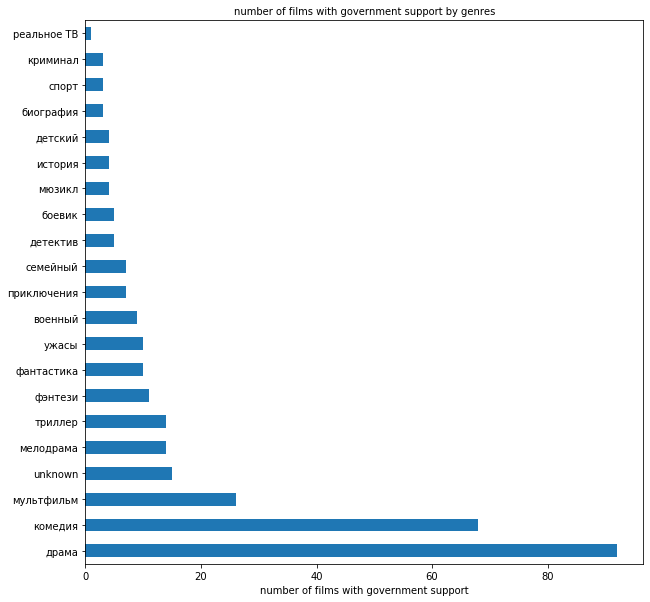

In [439]:
goverment_help_films['general_genre'].value_counts().plot.barh(figsize=(10,10))

plt.xlabel('number of films with government support')
plt.title("number of films with government support by genres", fontsize=10); 

По количеству же снятых фильмов чаще всего гос. поддержку оказывают фильмам в жанре драма и комедия.

Рассмотрим, как распределяется финансирование по источникам.

In [440]:
goverment_help_films_total_median_sources = goverment_help_films.pivot_table(index='financing_source',
                                                                  values=['total_support'],
                                                                  aggfunc='median')
display(goverment_help_films_total_median_sources)

,total_support
financing_source,
Министерство культуры,28000000.0
"Министерство культуры, Фонд кино",49000000.0
Фонд кино,60000000.0


Фонд кино финансирует куда больше, нежели министерство культуры.

### Шаг 5. Напишите общий вывод

Итог:

- 2015 и 2017 года стали рекордсмена по количеству фильмов, вышедших в прокат;
- до 2013 года сумма сборов была минимальной, в 2015 наблюдается резкий рост по данному показателю, максимум был достигнут в 2018 году;
- больше всего денег собрали фильмы с возрастным ограничением «6+», возрастные ограничения, возможно, увеличивают стоимость билета, фильмы на общую аудиторию ниже оцениваются зрителями;
- в целом динамика объёма возвратных средств государственной поддержки и объёма невозвратных средств государственной поддержки совпадает, максимум приходится на 2017 год;
- окупаемость фильма не зависит от рейтинга фильма;
- фильмы с большей государственной поддержкой по итогу имели высокие и средние рейтинги;
- больше всего средств государственной поддержки было оказано историческим фильмам и мультфильмам, меньше всего фильмам в жанре фантастика;
- по количеству же снятых фильмов чаще всего гос. поддержку оказывают фильмам в жанре драма и комедия;
- Фонд кино финансирует куда больше средств, нежели Министерство культуры.

